In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy

from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error

from modules.utils import SYMPTOM_COLUMNS, SYMPTOM_NAMES
from modules.eval import *
from modules.plot import *

%load_ext autoreload
%autoreload 2

In [2]:
rsv_df = pd.read_csv("./datasets/combined.csv")

In [3]:
rsv_df

,date,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:muscle weakness,...,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting,daily_new_positives,cumulative_positives,num_daily_tests,cumulative_tests,test_positivity_rate,symptom:combined
0,2021-01-01,0.32,0.37,0.30,3.75,3.50,3.72,3.49,4.49,0.16,...,2.12,0.65,1.40,2.85,15074,1005785,202446,25706759,0.0745,14.8431
1,2021-01-02,0.36,0.42,0.30,3.90,3.38,3.95,3.65,4.08,0.16,...,1.90,0.69,1.43,2.40,11368,1017153,142345,25849104,0.0799,14.8717
2,2021-01-03,0.34,0.46,0.29,3.88,3.39,4.03,3.69,3.83,0.17,...,1.84,0.70,1.40,2.37,11209,1028362,134360,25983464,0.0834,14.7662
3,2021-01-04,0.28,0.34,0.31,3.93,3.37,4.34,4.00,3.93,0.22,...,1.85,0.77,1.42,2.27,12666,1041028,152402,26135866,0.0831,15.3282
4,2021-01-05,0.27,0.32,0.33,3.98,3.38,4.42,4.11,4.31,0.22,...,1.81,0.74,1.40,2.14,16648,1057676,197816,26333682,0.0842,15.6898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.30,0.41,0.59,11.15,4.21,4.14,8.29,4.26,0.19,...,2.26,0.80,4.22,3.26,40780,3251712,210996,87447878,0.1933,27.0476
361,2021-12-28,0.31,0.43,0.63,11.92,4.18,4.41,9.06,4.57,0.21,...,2.27,0.82,4.36,3.19,67090,3318802,362594,87810472,0.1850,28.7918
362,2021-12-29,0.33,0.43,0.58,11.88,4.15,4.29,8.78,4.48,0.20,...,2.29,0.83,4.36,3.15,74207,3393009,336469,88146941,0.2205,28.3798
363,2021-12-30,0.34,0.43,0.53,11.46,4.12,4.11,8.28,4.46,0.20,...,2.25,0.83,4.22,3.06,76555,3469564,339853,88486794,0.2253,27.3794


In [4]:
media_df = pd.read_csv("./datasets/media_count_ratio_all_2021.csv")

In [5]:
media_df

,date,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:loss of smell,symptom:loss of taste,symptom:muscle weakness,symptom:nasal congestion,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting,symptom:combined,daily_new_positives
0,2021-01-01,0.0,0.000000,0.001309,0.002618,0.001745,0.006981,0.010471,0.002182,0.000000,0.000873,0.0,0.0,0.000000,0.002182,0.000436,0.002618,0.019437,15074
1,2021-01-02,0.0,0.000604,0.000000,0.004831,0.000604,0.019928,0.003019,0.000000,0.001208,0.000604,0.0,0.0,0.000000,0.000604,0.000000,0.001208,0.019680,11368
2,2021-01-03,0.0,0.000000,0.002271,0.002839,0.000000,0.005679,0.007382,0.002839,0.000568,0.001136,0.0,0.0,0.000000,0.001136,0.000000,0.000000,0.015565,11209
3,2021-01-04,0.0,0.000000,0.002441,0.002197,0.000244,0.004150,0.005371,0.002441,0.000000,0.000488,0.0,0.0,0.001465,0.001465,0.000488,0.000244,0.013347,12666
4,2021-01-05,0.0,0.000000,0.001320,0.001320,0.000660,0.007038,0.004838,0.001539,0.001539,0.000660,0.0,0.0,0.001539,0.001320,0.001320,0.000880,0.013250,16648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.0,0.000000,0.039474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.024868,40780
361,2021-12-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,67090
362,2021-12-29,0.0,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.025641,0.000000,0.000000,0.056667,74207
363,2021-12-30,0.0,0.000000,0.000000,0.000000,0.007143,0.007143,0.028571,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.007143,0.007143,0.033786,76555


In [6]:
symptoms_list = SYMPTOM_COLUMNS

In [7]:
# Apply linear regression to predict <lag> days ahead fitting on predictor_data and response_data
def linear_rolling_rsme(predictor_data, response_data, lag):
    predictions = []
    actuals = []
    for i in range(len(rsv_data) // 2 - lag - 1):
        X = predictor_data[: (len(predictor_data) // 2) + i, :]
        y = response_data[lag : (len(predictor_data) // 2 + i + lag)]
        model = LinearRegression().fit(X, y)
        X_test = [predictor_data[len(predictor_data) // 2 + i]]
        actuals.append(response_data[len(predictor_data) // 2 + i + lag])
        prediction = model.predict(X_test)
        predictions.append(prediction[0])
    return predictions, actuals


# Apply linear regression to predict <lag> days ahead fitting on predictor_data (including current day data) and response_data
def linear_rolling_rsme_with_current_cases(predictor_data, response_data, lag):
    predictions = []
    actuals = []
    for i in range(len(rsv_data) // 2 - lag - 1):
        X = predictor_data[: (len(predictor_data) // 2) + i, :]
        y_current = response_data[: (len(predictor_data) // 2 + i)].reshape((-1, 1))
        X = np.concatenate((X, y_current), axis=1)
        y = response_data[lag : (len(predictor_data) // 2 + i + lag)]
        model = LinearRegression().fit(X, y)
        X_test = [
            np.append(
                predictor_data[len(predictor_data) // 2 + i],
                (response_data[len(predictor_data) // 2 + i]),
            )
        ]
        actuals.append(response_data[len(predictor_data) // 2 + i + lag])
        prediction = model.predict(X_test)
        predictions.append(prediction[0])
    return predictions, actuals

In [8]:
def calc_best_lead(
    symptom_data, case_data, metric_fn=None, minimal=True, current_cases=False
):
    """Calculate best lead time between 1 to 30 days when using symptom (plus optionally current case count) data

    Args:
        symptom_data: symptom data (RSV or RSV + Media) to be used as predictor variable
        case_data: case count data to be used as response variable (and predictor if current_cases=True)
        metric_fn: A function from eval.py used to calculate best lead time
        minimal: whether best metric is minimal or maximal of values returned by metric_fn
        current_cases: whether to include current case count data as predictor variable

    Returns:
        best_lead: Lead time in days with best metric value
        best_score: Best metric value
    """

    scores = []
    for i in range(1, 30):
        if current_cases:
            predictions, actuals = linear_rolling_rsme_with_current_cases(
                symptom_data, case_data, i
            )
            score = metric_fn(predictions, actuals)
        else:
            predictions, actuals = linear_rolling_rsme(symptom_data, case_data, i)
            score = metric_fn(predictions, actuals)
        scores.append(score)
    scores = np.array(scores)
    best_lead = None
    best_score = None
    if minimal:
        best_lead = np.argmin(scores) + 1
        best_score = np.min(scores)
    else:
        best_lead = np.argmax(scores) + 1
        best_score = np.max(scores)
    return best_lead, best_score


def calc_best_leads_all_metrics(symptom_data, case_data, current_cases=False):
    """Calculate best lead time between 1 to 30 days for all eval suite metrics when using symptom (plus optionally current case count) data

    Args:
        symptom_data: symptom data (RSV or RSV + Media) to be used as predictor variable
        case_data: case count data to be used as response variable (and predictor if current_cases=True)
        current_cases: whether to include current case count data as predictor variable

    Returns:
        best_leads: Dictionary of best lead times for different metrics
        best_scores: Dictionary of best scores for different metrics corresponding to best lead times
    """

    scores_dict = {
        "rmse": [],
        "dtw distance": [],
        "pearson statistic": [],
        "pearson p-value": [],
        "spearman rho": [],
        "spearman p-value": [],
    }
    for i in range(1, 30):
        if current_cases:
            predictions, actuals = linear_rolling_rsme_with_current_cases(
                symptom_data, case_data, i
            )
            out = run_eval_suite_default(predictions, actuals)
            for metric in out:
                scores_dict[metric].append(out[metric])
        else:
            predictions, actuals = linear_rolling_rsme(symptom_data, case_data, i)
            out = run_eval_suite_default(predictions, actuals)
            for metric in out:
                scores_dict[metric].append(out[metric])
    best_leads = {}
    best_scores = {}
    for metric, scores in scores_dict.items():
        scores = np.array(scores)
        if metric == "pearson statistic" or metric == "spearman rho":
            best_leads[metric] = np.argmax(scores) + 1
            best_scores[metric] = np.max(scores)
        else:
            best_leads[metric] = np.argmin(scores) + 1
            best_scores[metric] = np.min(scores)
    return best_leads, best_scores

## Without Media Data

In [9]:
rsv_data = rsv_df[symptoms_list].to_numpy()
case_data = rsv_df["daily_new_positives"].to_numpy()

### Exclude current case counts data as predictor variable

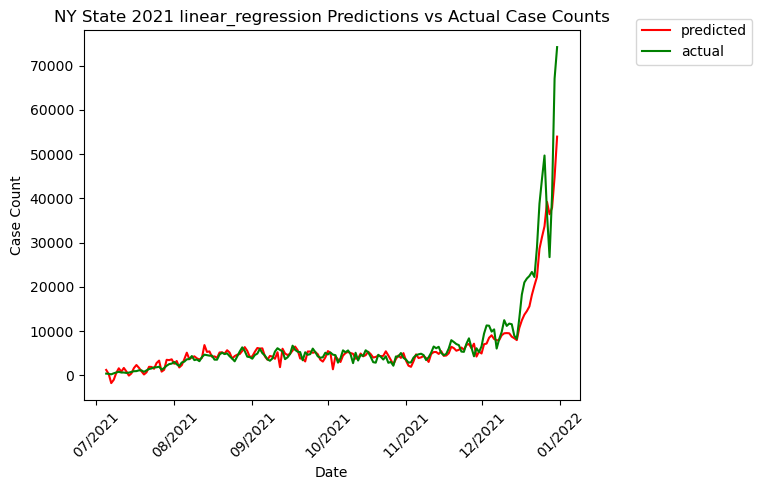

{'rmse': 3353.882734335431,
 'dtw distance': 4.156285189016142,
 'pearson statistic': 0.9689463168688219,
 'pearson p-value': 5.950394026529792e-110,
 'spearman rho': 0.8741676680732274,
 'spearman p-value': 9.891108809326771e-58}

In [11]:
# Next day predictions
predictions, actuals = linear_rolling_rsme(rsv_data, case_data, 1)
r1_no_media = get_model_results(
    predictions, actuals, "linear_regression", media=False, lead=1, save=True
)
plot_predictions_actual(r1_no_media, "linear_regression")
run_eval_suite_default(predictions, actuals)

In [12]:
# Next week predictions
predictions, actuals = linear_rolling_rsme(rsv_data, case_data, 7)
r7_no_media = get_model_results(
    predictions, actuals, "linear_regression", media=False, lead=7, save=True
)
run_eval_suite_default(predictions, actuals)

{'rmse': 4684.2291821043555,
 'dtw distance': 4.253706570931098,
 'pearson statistic': 0.9413990104129226,
 'pearson p-value': 4.237891804661302e-83,
 'spearman rho': 0.8370747164228362,
 'spearman p-value': 6.392001640684116e-47}

In [36]:
# Calculate best lead time using various metrics
calc_best_leads_all_metrics(rsv_data, case_data, current_cases=False)

({'rmse': 1,
  'dtw distance': 4,
  'pearson statistic': 1,
  'pearson p-value': 1,
  'spearman rho': 5,
  'spearman p-value': 5},
 {'rmse': 3353.882734335431,
  'dtw distance': 4.0171937058083955,
  'pearson statistic': 0.9689463168688219,
  'pearson p-value': 5.950394026529792e-110,
  'spearman rho': 0.8963138813886592,
  'spearman p-value': 2.365171745399283e-63})

### Include current case counts data as predictor variable

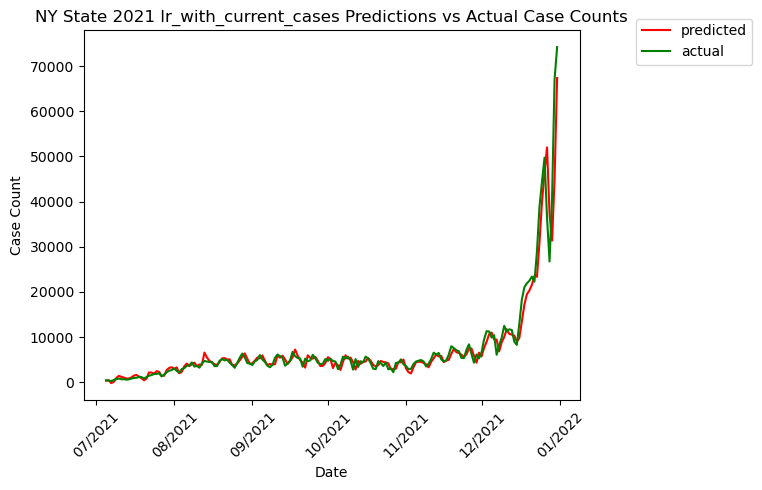

{'rmse': 2674.8584012990045,
 'dtw distance': 2.3179489813610212,
 'pearson statistic': 0.9675570216567322,
 'pearson p-value': 2.751408630527058e-108,
 'spearman rho': 0.9189664680338148,
 'spearman p-value': 7.525563861737477e-74}

In [13]:
# Next day predictions
predictions, actuals = linear_rolling_rsme_with_current_cases(rsv_data, case_data, 1)
r1_no_media_curr_cases = get_model_results(
    predictions, actuals, "lr_with_current_cases", media=False, lead=1, save=True
)
plot_predictions_actual(r1_no_media_curr_cases, "lr_with_current_cases")
run_eval_suite_default(predictions, actuals)

In [14]:
# Next week predictions
predictions, actuals = linear_rolling_rsme_with_current_cases(rsv_data, case_data, 7)
r7_no_media_curr_cases = get_model_results(
    predictions, actuals, "lr_with_current_cases", media=False, lead=7, save=True
)
run_eval_suite_default(predictions, actuals)

{'rmse': 3554.3754651952177,
 'dtw distance': 3.616230531929271,
 'pearson statistic': 0.954002675505814,
 'pearson p-value': 6.581323181787916e-92,
 'spearman rho': 0.8738013583583897,
 'spearman p-value': 9.689246273371573e-56}

In [39]:
# Calculate best lead time using various metrics
calc_best_leads_all_metrics(rsv_data, case_data, current_cases=True)

({'rmse': 1,
  'dtw distance': 1,
  'pearson statistic': 1,
  'pearson p-value': 1,
  'spearman rho': 1,
  'spearman p-value': 1},
 {'rmse': 2674.8584012990045,
  'dtw distance': 2.3179489813610212,
  'pearson statistic': 0.9675570216567322,
  'pearson p-value': 2.751408630527058e-108,
  'spearman rho': 0.9189664680338148,
  'spearman p-value': 7.525563861737477e-74})

## With Media Data

In [16]:
media_data = media_df[symptoms_list].to_numpy()
combined_data = np.concatenate((rsv_data, media_data), axis=1)

### Exclude current case counts data as predictor variable

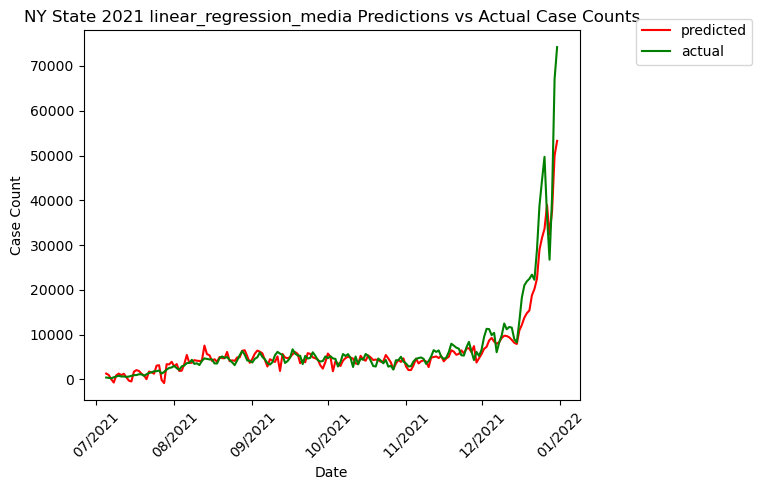

{'rmse': 3153.8293275193787,
 'dtw distance': 4.0743432509146835,
 'pearson statistic': 0.9756407398734928,
 'pearson p-value': 3.2947478226376005e-119,
 'spearman rho': 0.8572391272158795,
 'spearman p-value': 3.400999217221635e-53}

In [17]:
# Next day predictions
predictions, actuals = linear_rolling_rsme(combined_data, case_data, 1)
r1_media = get_model_results(
    predictions, actuals, "linear_regression", media=True, lead=1, save=True
)
plot_predictions_actual(r1_media, "linear_regression_media")
run_eval_suite_default(predictions, actuals)

In [18]:
# Next week predictions
predictions, actuals = linear_rolling_rsme(combined_data, case_data, 7)
r7_media = get_model_results(
    predictions, actuals, "linear_regression", media=True, lead=7, save=True
)
run_eval_suite_default(predictions, actuals)

{'rmse': 4675.032817856638,
 'dtw distance': 4.349096997177451,
 'pearson statistic': 0.9429526872035086,
 'pearson p-value': 4.494920120142357e-84,
 'spearman rho': 0.8087572169096797,
 'spearman p-value': 1.6804855323733244e-41}

In [43]:
# Calculate best lead time using various metrics
calc_best_leads_all_metrics(combined_data, case_data, current_cases=False)

({'rmse': 1,
  'dtw distance': 2,
  'pearson statistic': 1,
  'pearson p-value': 1,
  'spearman rho': 5,
  'spearman p-value': 5},
 {'rmse': 3153.8293275193787,
  'dtw distance': 3.2699375817540712,
  'pearson statistic': 0.9756407398734928,
  'pearson p-value': 3.2947478226376005e-119,
  'spearman rho': 0.8868003231373522,
  'spearman p-value': 3.2006353236976877e-60})

### Include current case counts data as predictor variable

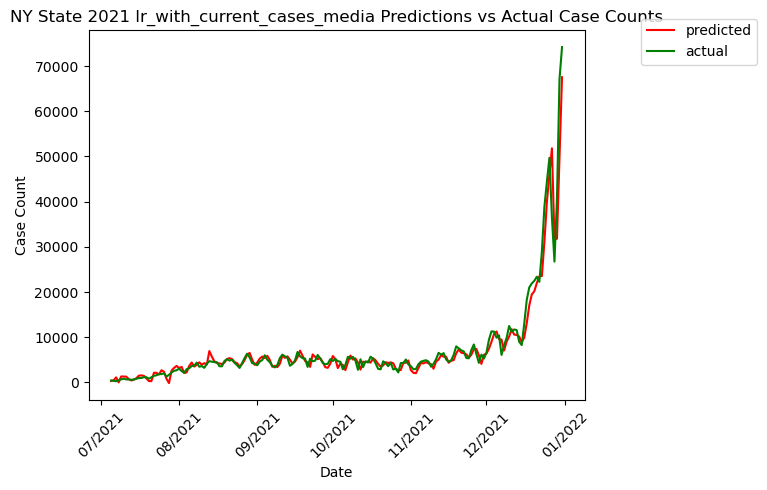

{'rmse': 2359.9486618528863,
 'dtw distance': 2.3051138883548092,
 'pearson statistic': 0.9758188467799802,
 'pearson p-value': 1.728135235452886e-119,
 'spearman rho': 0.9086471982635947,
 'spearman p-value': 2.0232379731708363e-69}

In [19]:
# Next day predictions
predictions, actuals = linear_rolling_rsme_with_current_cases(
    combined_data, case_data, 1
)
r1_media_curr_cases = get_model_results(
    predictions, actuals, "lr_with_current_cases", media=True, lead=1, save=True
)
plot_predictions_actual(r1_media_curr_cases, "lr_with_current_cases_media")
run_eval_suite_default(predictions, actuals)

In [20]:
# Next week predictions
predictions, actuals = linear_rolling_rsme_with_current_cases(
    combined_data, case_data, 7
)
r7_media_curr_cases = get_model_results(
    predictions, actuals, "lr_with_current_cases", media=True, lead=7, save=True
)
run_eval_suite_default(predictions, actuals)

{'rmse': 3575.7134097287853,
 'dtw distance': 3.2045125352192625,
 'pearson statistic': 0.9537994364883275,
 'pearson p-value': 9.531998461749114e-92,
 'spearman rho': 0.8640334042185445,
 'spearman p-value': 3.8050419675935823e-53}

In [46]:
# Calculate best lead time using various metrics
calc_best_leads_all_metrics(combined_data, case_data, current_cases=True)

({'rmse': 1,
  'dtw distance': 1,
  'pearson statistic': 1,
  'pearson p-value': 1,
  'spearman rho': 1,
  'spearman p-value': 1},
 {'rmse': 2359.9486618528863,
  'dtw distance': 2.3051138883548092,
  'pearson statistic': 0.9758188467799802,
  'pearson p-value': 1.728135235452886e-119,
  'spearman rho': 0.9086471982635947,
  'spearman p-value': 2.0232379731708363e-69})

## Combined

True


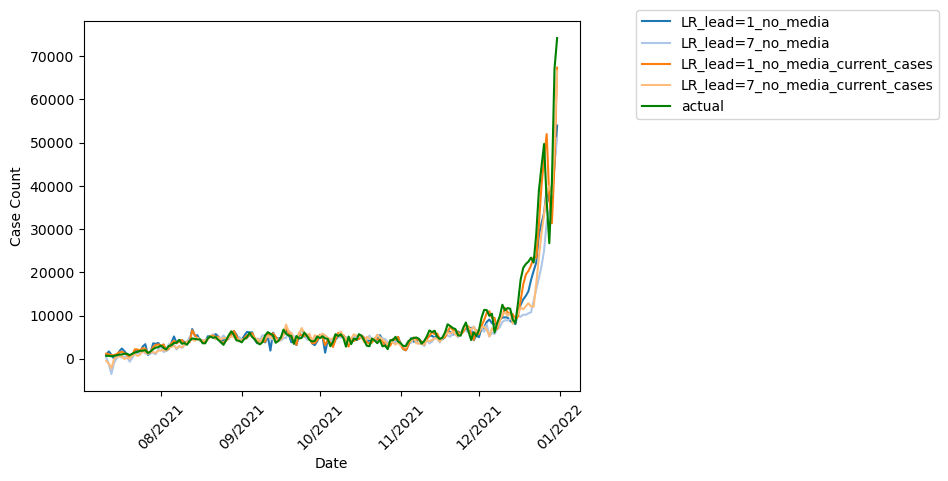

In [66]:
results_dfs = [r1_no_media, r7_no_media, r1_no_media_curr_cases, r7_no_media_curr_cases]
lens = [len(df) for df in results_dfs]
min_len = min(lens)
results_dfs = [df[len(df) - min_len :].reset_index() for df in results_dfs]
plot_multiple_predictions_actual(
    results_dfs,
    [
        "LR_lead=1_no_media",
        "LR_lead=7_no_media",
        "LR_lead=1_no_media_current_cases",
        "LR_lead=7_no_media_current_cases",
    ],
    plot_name="linear_regression_no_media",
    rolling=False,
    set_title=False,
    ylabel="Case Count",
)

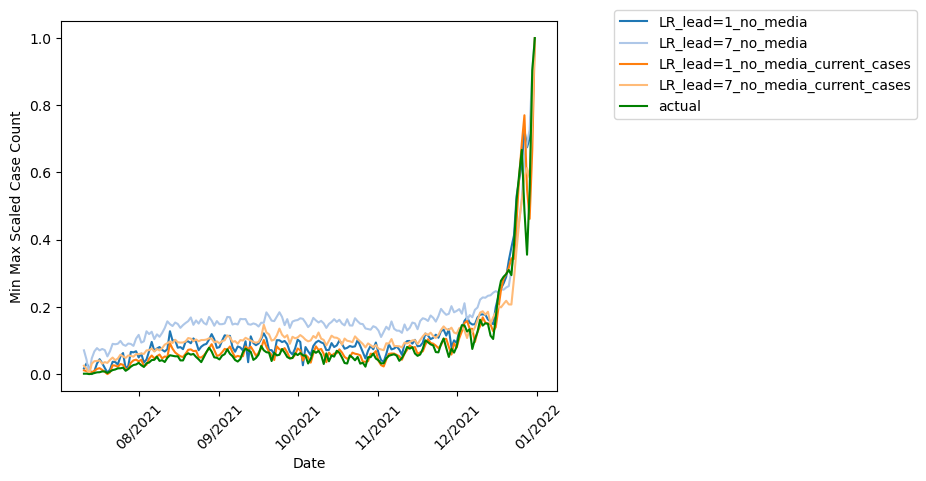

In [68]:
results_dfs = [r1_no_media, r7_no_media, r1_no_media_curr_cases, r7_no_media_curr_cases]
lens = [len(df) for df in results_dfs]
min_len = min(lens)
results_dfs = [df[len(df) - min_len :].reset_index() for df in results_dfs]
for results_df in results_dfs:
    results_df["predicted_case_count"] = (
        MinMaxScaler().fit_transform(results_df[["predicted_case_count"]]).flatten()
    )
    results_df["actual_case_count"] = (
        MinMaxScaler().fit_transform(results_df[["actual_case_count"]]).flatten()
    )
plot_multiple_predictions_actual(
    results_dfs,
    [
        "LR_lead=1_no_media",
        "LR_lead=7_no_media",
        "LR_lead=1_no_media_current_cases",
        "LR_lead=7_no_media_current_cases",
    ],
    plot_name="linear_regression_no_media_minmaxscaled",
    rolling=False,
    set_title=False,
    ylabel="Min Max Scaled Case Count",
)

True


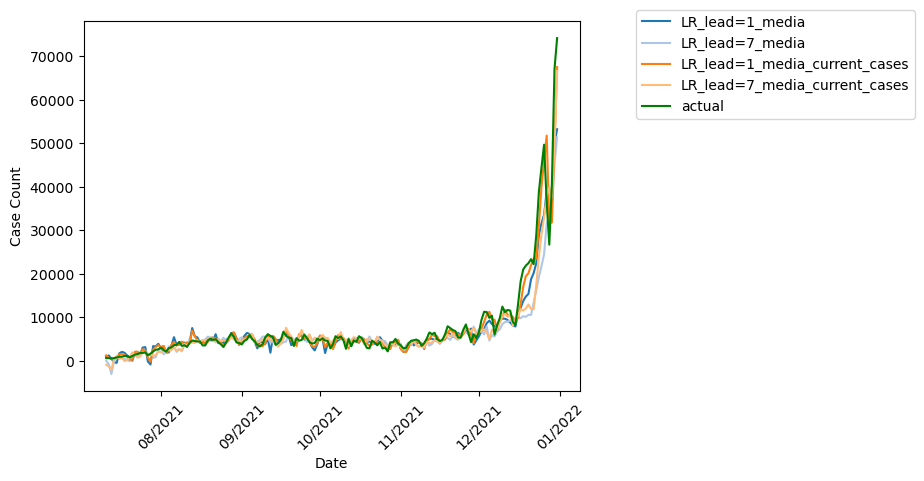

In [67]:
results_dfs = [r1_media, r7_media, r1_media_curr_cases, r7_media_curr_cases]
lens = [len(df) for df in results_dfs]
min_len = min(lens)
results_dfs = [df[len(df) - min_len :].reset_index() for df in results_dfs]
plot_multiple_predictions_actual(
    results_dfs,
    [
        "LR_lead=1_media",
        "LR_lead=7_media",
        "LR_lead=1_media_current_cases",
        "LR_lead=7_media_current_cases",
    ],
    plot_name="linear_regression_media",
    rolling=False,
    set_title=False,
    ylabel="Case Count",
)

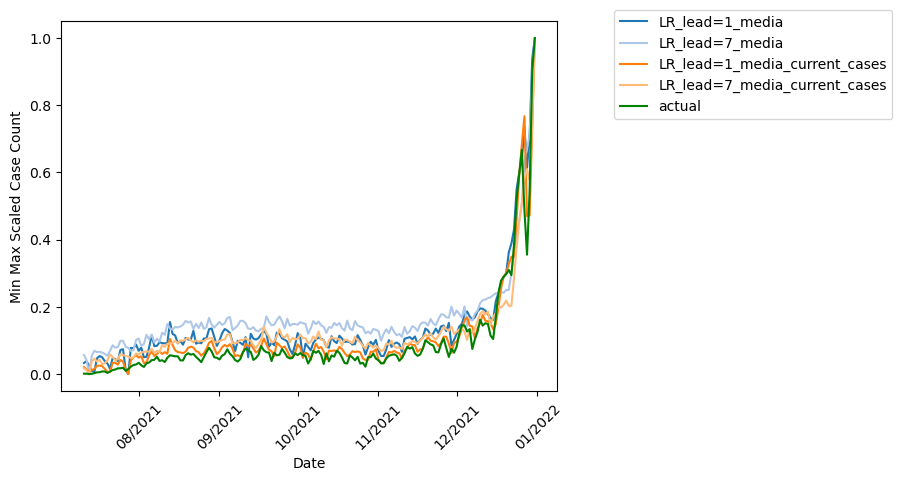

In [69]:
results_dfs = [r1_media, r7_media, r1_media_curr_cases, r7_media_curr_cases]
lens = [len(df) for df in results_dfs]
min_len = min(lens)
results_dfs = [df[len(df) - min_len :].reset_index() for df in results_dfs]
for results_df in results_dfs:
    results_df["predicted_case_count"] = (
        MinMaxScaler().fit_transform(results_df[["predicted_case_count"]]).flatten()
    )
    results_df["actual_case_count"] = (
        MinMaxScaler().fit_transform(results_df[["actual_case_count"]]).flatten()
    )
plot_multiple_predictions_actual(
    results_dfs,
    [
        "LR_lead=1_media",
        "LR_lead=7_media",
        "LR_lead=1_media_current_cases",
        "LR_lead=7_media_current_cases",
    ],
    plot_name="linear_regression_media_minmaxscaled",
    rolling=False,
    set_title=False,
    ylabel="Min Max Scaled Case Count",
)